# 0. Setup Paths

In [1]:
import os


In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [7]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo

In [16]:
# https://www.tensorflow.org/install/source_windows

In [9]:
if os.name=='nt':
    !pip install wget
    import wget


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

^C


In [10]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1468733 / 1468733        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
creating build
creating build\lib
creating build\lib\object_detection
copying object_detection\eval_util.py -> build\lib\object_detection
copying object_detection\eval_util_test.py -> build\lib\object_detection
copying object_detection\exporter.py -> build\lib\object_detection
copying object_detection\exporter_lib_tf2_test.py -> build\lib\object_detection
copying object_detection\exporter_lib_v2.py -> build\lib\object_detection
copying object_detection\exporter_main_v2.py -> build\lib\object_detection
copying object_detection\exporter_tf1_test.py -> build\lib\object_detection
copying object_detection\export_inference_graph.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2_test.py -> build

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-310: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-310: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-310: module MAY be using inspect.stack
error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/


Obtaining file:///D:/ANPR1/Tensorflow/models/research/slim
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py develop for slim



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.10.0: D:\ANPR1\anprsys1\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2024-03-21 22:16:11.031031: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-21 22:16:20.038870: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2141 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5
D:\ANPR1\anprsys1\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\builders\model_builder.py:1112: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(('Building experimental DeepMAC meta-arch.'
W0321 2

In [11]:
!pip install tensorflow tensorflow-gpu --upgrade

  Using cached tensorflow-2.10.0-cp310-cp310-win_amd64.whl (455.9 MB)
  Using cached tensorflow_gpu-2.10.0-cp310-cp310-win_amd64.whl (455.9 MB)
  Using cached typing_extensions-4.4.0-py3-none-any.whl (26 kB)
  Using cached keras-2.10.0-py2.py3-none-any.whl (1.7 MB)
  Using cached termcolor-2.1.0-py3-none-any.whl (5.8 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached grpcio-1.50.0-cp310-cp310-win_amd64.whl (3.6 MB)
  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorboard-2.10.1-py3-none-any.whl (5.9 MB)
  Using cached flatbuffers-22.10.26-py2.py3-none-any.whl (26 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached wrapt-1.14.1-cp310-cp310-win_amd64.whl (35 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached protobuf-3.19.6-cp310-cp310-win_amd64.whl (895 kB)
  Using cached h5py-3.7.0-cp310-cp310-win_amd64.wh

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
object-detection 0.1 requires lvis, which is not installed.
object-detection 0.1 requires lxml, which is not installed.
object-detection 0.1 requires matplotlib, which is not installed.
object-detection 0.1 requires pandas, which is not installed.
object-detection 0.1 requires pillow, which is not installed.
object-detection 0.1 requires pycocotools, which is not installed.
object-detection 0.1 requires scipy, which is not installed.
object-detection 0.1 requires tensorflow_io, which is not installed.
object-detection 0.1 requires tf-models-official>=2.5.

In [12]:
!pip install scipy

  Using cached scipy-1.9.3-cp310-cp310-win_amd64.whl (40.1 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
object-detection 0.1 requires lvis, which is not installed.
object-detection 0.1 requires lxml, which is not installed.
object-detection 0.1 requires matplotlib, which is not installed.
object-detection 0.1 requires pandas, which is not installed.
object-detection 0.1 requires pillow, which is not installed.
object-detection 0.1 requires pycocotools, which is not installed.
object-detection 0.1 requires tensorflow_io, which is not installed.
object-detection 0.1 requires tf-models-official>=2.5.1, which is not installed.
object-detection 0.1 requires pypa

In [13]:
!pip install Pillow

  Using cached Pillow-9.3.0-cp310-cp310-win_amd64.whl (2.5 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
object-detection 0.1 requires lvis, which is not installed.
object-detection 0.1 requires lxml, which is not installed.
object-detection 0.1 requires matplotlib, which is not installed.
object-detection 0.1 requires pandas, which is not installed.
object-detection 0.1 requires pycocotools, which is not installed.
object-detection 0.1 requires tensorflow_io, which is not installed.
object-detection 0.1 requires tf-models-official>=2.5.1, which is not installed.
object-detection 0.1 requires pyparsing==2.4.7, but you have pyparsing 3.0.9 which is incompatib

In [15]:
!pip install matplotlib

  Using cached matplotlib-3.6.2-cp310-cp310-win_amd64.whl (7.2 MB)
  Using cached kiwisolver-1.4.4-cp310-cp310-win_amd64.whl (55 kB)
  Using cached contourpy-1.0.6-cp310-cp310-win_amd64.whl (163 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
object-detection 0.1 requires lvis, which is not installed.
object-detection 0.1 requires lxml, which is not installed.
object-detection 0.1 requires pandas, which is not installed.
object-detection 0.1 requires pycocotools, which is not installed.
object-detection 0.1 requires tensorflow_io, which is not installed.
object-detection 0.1 requires tf-models-official>=2.5.1, which is not installed.
object-detection 0.1 requires pyparsing==2.4.7, but you have pyparsing 3.0.9 which is incompatible.


In [17]:
!pip install tensorflow_io

  Using cached tensorflow_io-0.27.0-cp310-cp310-win_amd64.whl (22.9 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
object-detection 0.1 requires lvis, which is not installed.
object-detection 0.1 requires lxml, which is not installed.
object-detection 0.1 requires pandas, which is not installed.
object-detection 0.1 requires pycocotools, which is not installed.
object-detection 0.1 requires tf-models-official>=2.5.1, which is not installed.
object-detection 0.1 requires pyparsing==2.4.7, but you have pyparsing 3.0.9 which is incompatible.


In [19]:
!pip install tf-models-official

  Using cached tf_models_official-2.10.0-py2.py3-none-any.whl (2.2 MB)
  Using cached immutabledict-2.2.3-py3-none-any.whl (4.0 kB)
  Using cached tensorflow_hub-0.12.0-py2.py3-none-any.whl (108 kB)
  Using cached kaggle-1.5.12-py3-none-any.whl
  Using cached gin_config-0.5.0-py3-none-any.whl (61 kB)
  Using cached google_api_python_client-2.65.0-py2.py3-none-any.whl (10.4 MB)
  Using cached tf_models_official-2.9.2-py2.py3-none-any.whl (2.1 MB)
  Using cached tensorflow_addons-0.18.0-cp310-cp310-win_amd64.whl (755 kB)
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl (22 kB)
  Using cached tensorflow_model_optimization-0.7.3-py2.py3-none-any.whl (238 kB)
  Using cached sentencepiece-0.1.97-cp310-cp310-win_amd64.whl (1.1 MB)
  Using cached opencv_python_headless-4.6.0.66-cp36-abi3-win_amd64.whl (35.5 MB)
  Using cached tensorflow-2.9.2-cp310-cp310-win_amd64.whl (444.2 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires lvis, which is not installed.
tensorflow-gpu 2.10.0 requires flatbuffers>=2.0, but you have flatbuffers 1.12 which is incompatible.
tensorflow-gpu 2.10.0 requires keras<2.11,>=2.10.0, but you have keras 2.9.0 which is incompatible.
tensorflow-gpu 2.10.0 requires tensorboard<2.11,>=2.10, but you have tensorboard 2.9.1 which is incompatible.
tensorflow-gpu 2.10.0 requires tensorflow-estimator<2.11,>=2.10.0, but you have tensorflow-estimator 2.9.0 which is incompatible.
object-detection 0.1 requires pyparsing==2.4.7, but you have pyparsing 3.0.9 which is incompatible.


  Using cached Cython-0.29.32-py2.py3-none-any.whl (986 kB)
  Using cached seqeval-1.2.2-py3-none-any.whl
  Using cached tensorflow_text-2.9.0-cp310-cp310-win_amd64.whl (4.4 MB)
  Using cached pandas-1.5.1-cp310-cp310-win_amd64.whl (10.4 MB)
  Using cached PyYAML-5.4.1-cp310-cp310-win_amd64.whl
  Using cached oauth2client-4.1.3-py2.py3-none-any.whl (98 kB)
  Using cached pycocotools-2.0.6-cp310-cp310-win_amd64.whl
  Using cached tensorflow_datasets-4.7.0-py3-none-any.whl (4.7 MB)
  Using cached google_api_core-2.10.2-py3-none-any.whl (115 kB)
  Using cached uritemplate-4.1.1-py2.py3-none-any.whl (10 kB)
  Using cached google_auth_httplib2-0.1.0-py2.py3-none-any.whl (9.3 kB)
  Using cached httplib2-0.21.0-py3-none-any.whl (96 kB)
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
  Using cached python_slugify-6.1.2-py2.py3-none-any.whl (9.4 kB)
  Using cached pytz-2022.6-py2.py3-none-any.whl (498 kB)
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Using cached flatbuffer

In [13]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.15.7
Uninstalling protobuf-3.15.7:
  Successfully uninstalled protobuf-3.15.7
Found existing installation: matplotlib 3.4.1
Uninstalling matplotlib-3.4.1:
  Successfully uninstalled matplotlib-3.4.1

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.28.0 requires crcmod<2.0,>=1.7, which is not installed.
apache-beam 2.28.0 requires dill<0.3.2,>=0.3.1.1, which is not installed.
apache-beam 2.28.0 requires fastavro<2,>=0.21.4, which is not installed.
apache-beam 2.28.0 requires future<1.0.0,>=0.18.2, which is not installed.
apache-beam 2.28.0 requires grpcio<2,>=1.29.0, which is not installed.
apache-beam 2.28.0 requires hdfs<3.0.0,>=2.1.0, which is not installed.
apache-beam 2.28.0 requires httplib2<0.18.0,>=0.8, which is not installed.
apache-beam 2.28.0 requires mock<3.0.0,>=1.0.1, which is not installed.
tensorflow 2.5.0rc0 requires astunparse~=1.6.3, which is not installed.
tensorflow 2.5.0rc0 requires flatbuffers~=1.12.0, which is not installed.
tensorflow 2.5.0rc0 requires gast==0.4.0, which is not installed.
tensorflow 2.5.0rc0 requires go


  Using cached matplotlib-3.2.0-cp37-cp37m-win_amd64.whl (9.2 MB)


In [12]:
import object_detection

In [21]:
!pip list

Package                       Version              Editable project location
----------------------------- -------------------- ----------------------------------------
absl-py                       1.3.0
aggdraw                       1.3.16
altair                        4.2.2
ann-visualizer                2.5
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
asttokens                     2.1.0
astunparse                    1.6.3
attrs                         22.1.0
backcall                      0.2.0
beautifulsoup4                4.11.1
bleach                        5.0.1
blinker                       1.5
cachetools                    5.2.0
certifi                       2022.9.24
cffi                          1.15.1
charset-normalizer            2.1.1
click                         8.1.3
colorama                      0.4.6
contourpy                     1.0.6
cycler                        0.1


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [........................................................................] 20515344 / 20515344        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [14]:
labels = [{'name':'licence', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [15]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [16]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

Cloning into 'Tensorflow\scripts'...


In [17]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


# 4. Copy Model Config to Training Folder

In [27]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [5]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [6]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [30]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [31]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [32]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [33]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [25]:
pip install lvis

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires pyparsing==2.4.7, but you have pyparsing 3.0.9 which is incompatible.



  Using cached lvis-0.5.3-py3-none-any.whl (14 kB)
  Using cached opencv_python-4.6.0.66-cp36-abi3-win_amd64.whl (35.6 MB)


In [34]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [35]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=10000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [36]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=10000


In [ ]:
!{command}

# 7. Evaluate the Model

In [20]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [21]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet


In [22]:
!{command}

^C


In [ ]:
%load_ext tensorboard
%tensorboard --logdir '/content/training/'

# 8. Load Train Model From Checkpoint

In [5]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [6]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-11')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [7]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [9]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'Cars416.png')

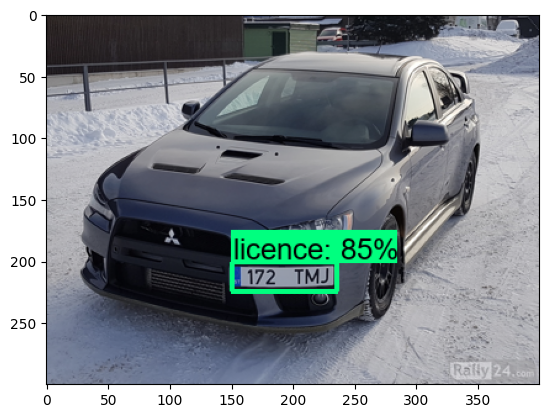

In [10]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
import easyocr

D:\ANPR1\anprsys1\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
detection_threshold = 0.7

In [13]:
image = image_np_with_detections
scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
boxes = detections['detection_boxes'][:len(scores)]
classes = detections['detection_classes'][:len(scores)]

In [14]:
width = image.shape[1]
height = image.shape[0]

[0.67187524 0.37613642 0.74778986 0.5922371 ]
[201.56257153 150.45456886 224.33695793 236.89484596]
[([[9, 3], [41, 3], [41, 21], [9, 21]], '172', 0.532383346344517), ([[49, 3], [83, 3], [83, 21], [49, 21]], 'TMJ', 0.9045972602712842)]


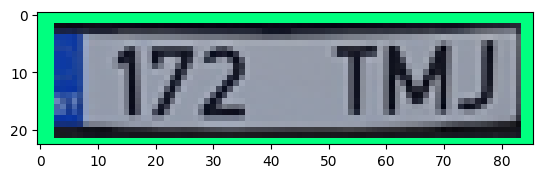

In [15]:
# Apply ROI filtering and OCR
for idx, box in enumerate(boxes):
    print(box)
    roi = box*[height, width, height, width]
    print(roi)
    region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
    #plate = pytesseract.image_to_string(region, lang = 'eng', config = custom_config)
    reader = easyocr.Reader(['en'])
    ocr_result = reader.readtext(region)
    print(ocr_result)
    #print("Number plate is: ", plate)
    plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))

In [16]:
for result in ocr_result:
    print(np.sum(np.subtract(result[0][2],result[0][1])))
    print(result[1])

18
172
18
TMJ


In [17]:
region_threshold = 0.05

In [18]:
def filter_text(region, ocr_result, region_threshold):
    rectangle_size = region.shape[0]*region.shape[1]
    
    plate = [] 
    for result in ocr_result:
        length = np.sum(np.subtract(result[0][1], result[0][0]))
        height = np.sum(np.subtract(result[0][2], result[0][1]))
        
        if length*height / rectangle_size > region_threshold:
            plate.append(result[1])
    return plate

In [19]:
filter_text(region, ocr_result, region_threshold)

['172', 'TMJ']

In [20]:
region_threshold = 0.05

In [21]:
def ocr_it(image, detections, detection_threshold, region_threshold):
    
    # Scores, boxes and classes above threhold
    scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
    boxes = detections['detection_boxes'][:len(scores)]
    classes = detections['detection_classes'][:len(scores)]
    
    # Full image dimensions
    width = image.shape[1]
    height = image.shape[0]
    
    # Apply ROI filtering and OCR
    for idx, box in enumerate(boxes):
        roi = box*[height, width, height, width]
        region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
        reader = easyocr.Reader(['en'])
        ocr_result = reader.readtext(region)
        
        text = filter_text(region, ocr_result, region_threshold)
        
        plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
        plt.show()
        print(text)
        return text, region

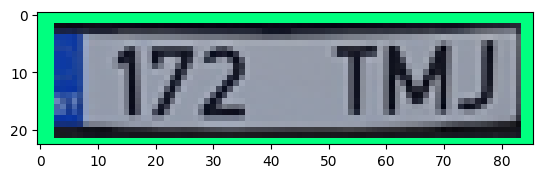

['172', 'TMJ']


In [22]:
text, region = ocr_it(image_np_with_detections, detections, detection_threshold, region_threshold)

In [23]:
import csv
import uuid

In [24]:
'{}.jpg'.format(uuid.uuid1())

'1ea52653-0390-11ef-8f67-f4104adc575b.jpg'

In [25]:
def save_results(text, region, dateTime, csv_filename, folder_path):
    img_name = '{}.jpg'.format(uuid.uuid1())
    
    cv2.imwrite(os.path.join(folder_path, img_name), region)
    
    with open(csv_filename, mode='a', newline='') as f:
        csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        csv_writer.writerow([img_name, text, dateTime])

In [26]:
import urllib.request
import serial
import time
from datetime import datetime

In [17]:
import urllib.request
url = "http://192.168.4.3"

In [17]:
def sendRequest(url):
    n = urllib.request.urlopen(url)

def getData():
        global data

        n = urllib.request.urlopen(url).read()
        n = n.decode("utf-8")

        data = n

In [18]:
def write_read():
    sendRequest(url)
    getData()
    x = data.split(",");
    print(x)

In [ ]:
write_read()

In [27]:
import socket

my_socket = socket.socket()

port = 5055
ip = "192.168.4.3"

my_socket.connect((ip, port))

def open_door():
    msg = '0'
    my_socket.sent(msg.encode())
    
def slot_data():
    msg = '1'
    my_socket.send(msg.encode())
    
    msg = (my_socket.recv(1024).decode())
    x = msg.split();
    return x
    
# def check_availability(length):
#     ToC = 0 # ToC = type of car, if ToC = 0 car is small
#     if length > 12:
#         ToC = 1 # if ToC = 1 car is large
    
#     slots = slot_data()
    
#     if ToC == 0 :
#         if(slots[0] == 1):
#             print("please park at S", 1)
#             open_door()

        
#         elif(slots[1] == 1):
#             print("No small slots available, please park at L", 1)
#             open_door()
        
#         else:
#             print("No parking space available")
            
            
#     else:
#         if(slots[1] == 1):
#             print("please park at L", 1)
#             open_door()
#         else:
#             print("No parking space available")
        
    
    


In [33]:
def check_availability(length):
    ToC = 0 # ToC = type of car, if ToC = 0 car is small
    if length > 12:
        ToC = 1 # if ToC = 1 car is large
    
    slots = slot_data()
    
    if ToC == 0 :
        if(slots[0] == '1'):
            print("please park at S", 1)
            open_door()
            return True
        
        elif(slots[1] == '1'):
            print("No small slots available, please park at L", 1)
            open_door()
            return True
        
        else:
            print("No parking space available")
            return False
            
            
    else:
        if(slots[1] == '1'):
            print("please park at L", 1)
            open_door()
            return True
        
        else:
            print("No parking space available")
            return False
        

In [34]:
slot_data()

['1', '1']

In [ ]:
open_door()

In [35]:
check_availability(10)

please park at S 1


AttributeError: 'socket' object has no attribute 'sent'

In [ ]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while True: 
    

    ret, frame = cap.read()
    image_np = np.array(frame)
    
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)
    
    
    try: 
        now = datetime.now()
        text, region = ocr_it(image_np_with_detections, detections, detection_threshold, region_threshold)
        #print("Hello")
        save_results(text, region, now.strftime("%d/%m/%Y %H:%M:%S") , 'detection_results.csv', 'Detection_Images')
        #write_read()
        
    except:
        #print("hello")
        pass

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        #cap.release()
        cv2.destroyAllWindows()
        break

In [27]:
import sys
import cv2
import numpy as np
import time
import imutils
from matplotlib import pyplot as plt
import math

import triangulation as tri
import calibration
import urllib.request
import torch

from ultralytics import YOLO

model = YOLO('yolov8n.pt')

x = []
y = []

frame_rate = 120
B = 3.5 #distance between the cameras in cm
f = 4.8 #camera focal length mm
alpha = 65
pt1 = torch.empty(0, 4, dtype=torch.int64)



def giveLen(img, boundbox, angle, depth):
    width = img.shape[1]
    height = img.shape[0]
    
    ratio = angle/width;
    
    centerOfFrame = width/2
    
    leftpix = centerOfFrame - boundbox[0]
    rightpix = boundbox[2] - centerOfFrame
    
    leftang = ratio*leftpix
    rightang = ratio*rightpix
    
    leftlen = math.tan((leftang * math.pi)/180)*depth
    rightlen = math.tan((rightang * math.pi) / 180) * depth
    
    return round(leftlen+rightlen)
    
    



def findCarLen():
    lengthOfCar = 0
    imgResponse = urllib.request.urlopen('http://192.168.4.1/capture?')
    frame = np.array(bytearray(imgResponse.read()), dtype = np.uint8)
    frame_left = cv2.imdecode(frame, -1)
    print(frame_left.shape)
    recFrame = frame_left

    imgResponse = urllib.request.urlopen('http://192.168.4.2/capture?')
    frame2 = np.array(bytearray(imgResponse.read()), dtype = np.uint8)
    frame_right = cv2.imdecode(frame2, -1)
        
    frame_right, frame_left = calibration.undistortRectify(frame_right, frame_left)
        
                
#     frame_right = cv2.cvtColor(frame_right, cv2.COLOR_BGR2RGB)
#     frame_left = cv2.cvtColor(frame_left, cv2.COLOR_BGR2RGB)
        
        
    results_right = model(frame_right, classes = 2, verbose=False)
    results_left = model(frame_left, classes = 2, verbose=False)
        
        
#     frame_right = cv2.cvtColor(frame_right, cv2.COLOR_RGB2BGR)
#     frame_left = cv2.cvtColor(frame_left, cv2.COLOR_RGB2BGR)
        
        
    center_right = 0
    center_left = 0
    
    if np.shape(results_right[0].boxes.xyxy) != np.shape(pt1):
        for result in results_right:
            frame_right = result.plot()
            h, w, c = frame_right.shape
            boundBox = result.boxes[0].xyxy[0].numpy()    
            center_point_right = ((boundBox[0] + boundBox[2]) / 2, (boundBox[1] + boundBox[3]) / 2)
            
                
    if np.shape(results_left[0].boxes.xyxy) != np.shape(pt1):
        for result in results_left:
            frame_left = result.plot()
            h, w, c = frame_left.shape
            boundBox = result.boxes[0].xyxy[0].numpy()
            center_point_left = ((boundBox[0] + boundBox[2]) / 2, (boundBox[1] + boundBox[3]) / 2)
                
        
    if np.shape(results_right[0].boxes.xyxy) != np.shape(pt1) and np.shape(results_left[0].boxes.xyxy) != np.shape(pt1):
        depth = tri.find_depth(center_point_right, center_point_left, frame_right, frame_left, B, f, alpha)
        x.append(depth)
        
        #getting the length of the car
        
        lenResults = model(recFrame, classes = 2, verbose=False)
        
        lengthOfCar = giveLen(recFrame, lenResults[0].boxes[0].xyxy[0].numpy(), alpha, depth)
        y.append(lengthOfCar)
        
            
    return lengthOfCar
#     cv2.imshow("frame right", frame_right)
#     cv2.imshow("frame left", frame_left)

In [19]:
while True: 
    

    imgResponse = urllib.request.urlopen('http://192.168.4.4/capture?')
    frame = np.array(bytearray(imgResponse.read()), dtype = np.uint8)
    image_np = cv2.imdecode(frame, -1)
    
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)
    
    
    try: 
        now = datetime.now()
        text, region = ocr_it(image_np_with_detections, detections, detection_threshold, region_threshold)
        length = findCarLen()
        print("lenght of the vehicle is", length)
        check_availability()
#         print("please move to Slot: L1")
        save_results(text, region, now.strftime("%d/%m/%Y %H:%M:%S") , 'detection_results.csv', 'Detection_Images')
#         write_read()
        
    except:
        #print("hello")
        pass

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        #cap.release()
        cv2.destroyAllWindows()
        break

In [1]:
%load_ext tensorboard
%tensorboard --logdir 'D:/ANPR1/Tensorflow/workspace/models/my_ssd_mobnet'

In [2]:
!kill 14096

'kill' is not recognized as an internal or external command,
operable program or batch file.


# Final Running script

In [1]:
import os

CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [16]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import easyocr
import csv
import uuid
import urllib.request
import serial
import time
from datetime import datetime




import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util


# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-11')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections




category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])
region_threshold = 0.05


def filter_text(region, ocr_result, region_threshold):
    rectangle_size = region.shape[0]*region.shape[1]
    
    plate = [] 
    for result in ocr_result:
        length = np.sum(np.subtract(result[0][1], result[0][0]))
        height = np.sum(np.subtract(result[0][2], result[0][1]))
        
        if length*height / rectangle_size > region_threshold:
            plate.append(result[1])
    return plate


def ocr_it(image, detections, detection_threshold, region_threshold):
    
    # Scores, boxes and classes above threhold
    scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
    boxes = detections['detection_boxes'][:len(scores)]
    classes = detections['detection_classes'][:len(scores)]
    
    # Full image dimensions
    width = image.shape[1]
    height = image.shape[0]
    
    # Apply ROI filtering and OCR
    for idx, box in enumerate(boxes):
        roi = box*[height, width, height, width]
        region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
        reader = easyocr.Reader(['en'])
        ocr_result = reader.readtext(region)
        
        text = filter_text(region, ocr_result, region_threshold)
        
        plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
        plt.show()
        print(text)
        return text, region
    
    

def save_results(text, region, dateTime, csv_filename, folder_path):
    img_name = '{}.jpg'.format(uuid.uuid1())
    
    cv2.imwrite(os.path.join(folder_path, img_name), region)
    
    with open(csv_filename, mode='a', newline='') as f:
        csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        csv_writer.writerow([img_name, text, dateTime])
        




In [27]:
import socket

my_socket = socket.socket()

port = 5055
ip = "192.168.4.3"

my_socket.connect((ip, port))

def open_door():
    msg = '0'
    my_socket.send(msg.encode())
    
def slot_data():
    msg = '1'
    my_socket.send(msg.encode())
    
    msg = (my_socket.recv(1024).decode())
    x = msg.split();
    return x

In [28]:
slot_data()

['1', '1']

In [29]:
def check_availability(length):
    ToC = 0 # ToC = type of car, if ToC = 0 car is small
    if length > 12:
        ToC = 1 # if ToC = 1 car is large
    
    slots = slot_data()
    print(slots)
    
    if ToC == 0 :
        if(slots[0] == '1'):
            print("please park at S", 1)
            open_door()
            return True
        
        elif(slots[1] == '1'):
            print("No small slots available, please park at L", 1)
            open_door()
            return True
        
        else:
            print("No parking space available")
            return False
            
            
    else:
        if(slots[1] == '1'):
            print("please park at L", 1)
            open_door()
            return True
        
        else:
            print("No parking space available")
            return False
        

In [30]:
check_availability(14)

['1', '1']
please park at L 1


True

In [31]:
import sys
import cv2
import numpy as np
import time
import imutils
from matplotlib import pyplot as plt
import math

import triangulation as tri
import calibration
import urllib.request
import torch

from ultralytics import YOLO

model = YOLO('yolov8n.pt')

x = []
y = []

frame_rate = 120
B = 3.5 #distance between the cameras in cm
f = 4.8 #camera focal length mm
alpha = 65
pt1 = torch.empty(0, 4, dtype=torch.int64)



def giveLen(img, boundbox, angle, depth):
    width = img.shape[1]
    height = img.shape[0]
    
    ratio = angle/width;
    
    centerOfFrame = width/2
    
    leftpix = centerOfFrame - boundbox[0]
    rightpix = boundbox[2] - centerOfFrame
    
    leftang = ratio*leftpix
    rightang = ratio*rightpix
    
    leftlen = math.tan((leftang * math.pi)/180)*depth
    rightlen = math.tan((rightang * math.pi) / 180) * depth
    
    return round(leftlen+rightlen)
    
    



def findCarLen():
    lengthOfCar = 0
    imgResponse = urllib.request.urlopen('http://192.168.4.1/capture?')
    frame = np.array(bytearray(imgResponse.read()), dtype = np.uint8)
    frame_left = cv2.imdecode(frame, -1)
    print(frame_left.shape)
    recFrame = frame_left

    imgResponse = urllib.request.urlopen('http://192.168.4.2/capture?')
    frame2 = np.array(bytearray(imgResponse.read()), dtype = np.uint8)
    frame_right = cv2.imdecode(frame2, -1)
        
    frame_right, frame_left = calibration.undistortRectify(frame_right, frame_left)
        
                
#     frame_right = cv2.cvtColor(frame_right, cv2.COLOR_BGR2RGB)
#     frame_left = cv2.cvtColor(frame_left, cv2.COLOR_BGR2RGB)
        
        
    results_right = model(frame_right, classes = 2, verbose=False)
    results_left = model(frame_left, classes = 2, verbose=False)
        
        
#     frame_right = cv2.cvtColor(frame_right, cv2.COLOR_RGB2BGR)
#     frame_left = cv2.cvtColor(frame_left, cv2.COLOR_RGB2BGR)
        
        
    center_right = 0
    center_left = 0
    
    if np.shape(results_right[0].boxes.xyxy) != np.shape(pt1):
        for result in results_right:
            frame_right = result.plot()
            h, w, c = frame_right.shape
            boundBox = result.boxes[0].xyxy[0].numpy()    
            center_point_right = ((boundBox[0] + boundBox[2]) / 2, (boundBox[1] + boundBox[3]) / 2)
            
                
    if np.shape(results_left[0].boxes.xyxy) != np.shape(pt1):
        for result in results_left:
            frame_left = result.plot()
            h, w, c = frame_left.shape
            boundBox = result.boxes[0].xyxy[0].numpy()
            center_point_left = ((boundBox[0] + boundBox[2]) / 2, (boundBox[1] + boundBox[3]) / 2)
                
        
    if np.shape(results_right[0].boxes.xyxy) != np.shape(pt1) and np.shape(results_left[0].boxes.xyxy) != np.shape(pt1):
        depth = tri.find_depth(center_point_right, center_point_left, frame_right, frame_left, B, f, alpha)
        x.append(depth)
        
        #getting the length of the car
        
        lenResults = model(recFrame, classes = 2, verbose=False)
        
        lengthOfCar = giveLen(recFrame, lenResults[0].boxes[0].xyxy[0].numpy(), alpha, depth)
        y.append(lengthOfCar)
    
    if lengthOfCar == 8:
        lengthOfCar = lengthOfCar+1
            
    return lengthOfCar
#     cv2.imshow("frame right", frame_right)
#     cv2.imshow("frame left", frame_left)

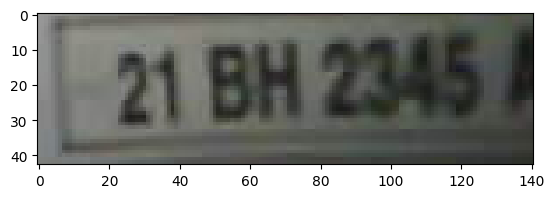

['21 BH 245']
(240, 320, 3)
lenght of the vehicle is 16
['1', '1']
please park at L 1


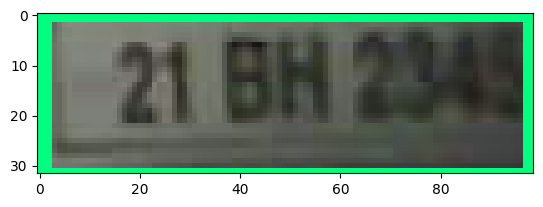

['21BHF']
(240, 320, 3)
lenght of the vehicle is 0
['1', '1']
please park at S 1


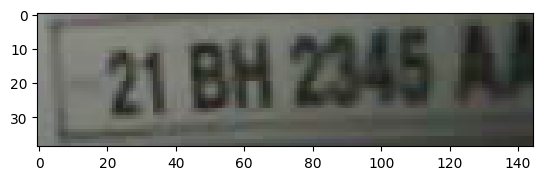

['21 BH Zy5n']
(240, 320, 3)
lenght of the vehicle is 17
['1', '1']
please park at L 1


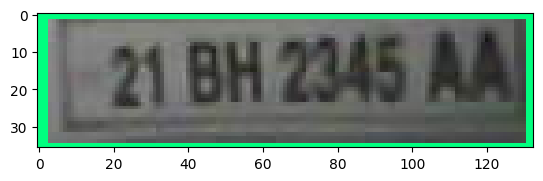

['21 BH 2 44544']
(240, 320, 3)
lenght of the vehicle is 18
['1', '1']
please park at L 1


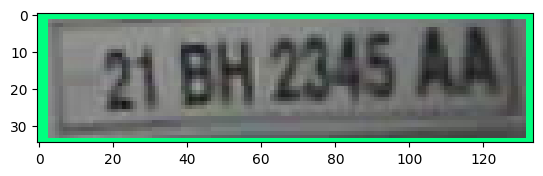

['21 BH 245 AA']
(240, 320, 3)
lenght of the vehicle is 16
['1', '1']
please park at L 1


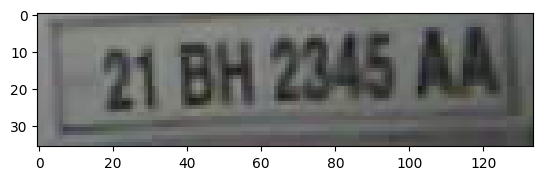

['21 BH 2245 AA']
(240, 320, 3)
lenght of the vehicle is 0
['1', '0']
please park at S 1


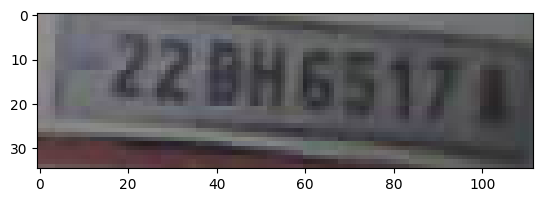

['~220H65174']
(240, 320, 3)
lenght of the vehicle is 0
['1', '0']
please park at S 1


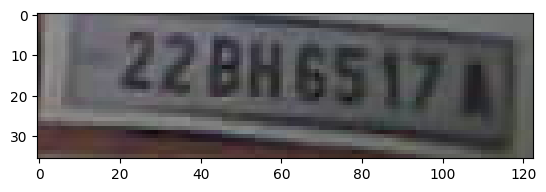

['2228h6517']
(240, 320, 3)
lenght of the vehicle is 0
['1', '0']
please park at S 1


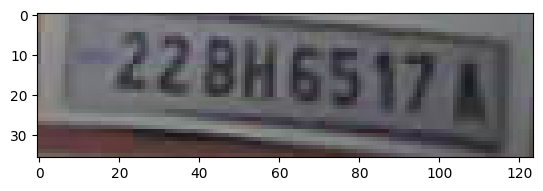

['228h6502 ']
(240, 320, 3)
lenght of the vehicle is 0
['1', '0']
please park at S 1


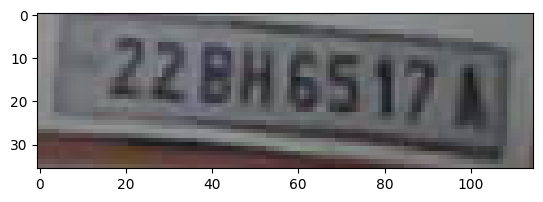

['228h6502']
(240, 320, 3)
lenght of the vehicle is 0
['1', '0']
please park at S 1


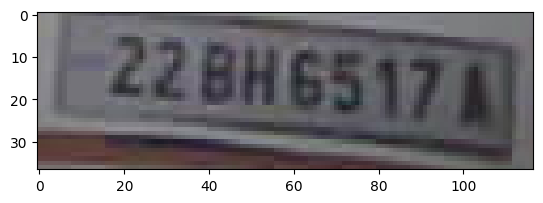

['220h6517']
(240, 320, 3)
lenght of the vehicle is 11
['1', '0']
please park at S 1


In [32]:
while True: 
    

    imgResponse = urllib.request.urlopen('http://192.168.4.4/capture?')
    frame = np.array(bytearray(imgResponse.read()), dtype = np.uint8)
    image_np = cv2.imdecode(frame, -1)
    
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)
    
    
    try: 
        now = datetime.now()
        text, region = ocr_it(image_np_with_detections, detections, detection_threshold, region_threshold)
        length = findCarLen()
        print("lenght of the vehicle is", length)
        check_availability(length)
        save_results(text, region, now.strftime("%d/%m/%Y %H:%M:%S") , 'detection_results.csv', 'Detection_Images')
#         write_read()
        
    except:
        #print("hello")
        pass

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        #cap.release()
        cv2.destroyAllWindows()
        break